# Linear Regression (Andrew Ng Method)

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Compute Predictions

In [69]:
def compute_predictions(x_b,theta):
    return x_b.dot(theta)

### Cost Function

In [70]:
def compute_cost(x_b,y,theta):
    m= len(y)
    prediction= compute_predictions(x_b,theta)
    errors = prediction - y
    cost= (1/(2*m))*np.sum(errors**2)

    return cost

### Gradient Descent

In [71]:
def gradient_descent(x_b, y, theta, alpha, iters, epsilon):
    m = len(y)
    cost_history = np.zeros(iters)

    for i in range(iters):
        prediction = compute_predictions(x_b, theta)
        errors = prediction - y
        gradients = (1/m) * x_b.T.dot(errors)
        theta = theta - alpha * gradients
        cost_history[i] = compute_cost(x_b, y, theta)

        if i > 0 and np.abs(cost_history[i] - cost_history[i-1]) < epsilon:  # Break if the cost reduction is too small
            break

    return theta, cost_history

### The training Data

In [72]:

x = np.array([[ 850], [1300], [1600], [2000], [2300], [1100], [2500], [1800], [2200], [1500], [1900], [2400], [1000], [2100], [1400], [2700], [1700], [2000], [1200], [1600], [1900], [ 900], [2300], [1300], [1800], [2100], [1400], [1700], [1000], [2200], [1500], [ 800], [1900], [1200], [1600]])
y = np.array([
    [120000], [270000], [450000], [320000], [500000],
    [180000], [600000], [280000], [420000], [350000],
    [380000], [550000], [150000], [400000], [250000],
    [650000], [300000], [480000], [220000], [330000],
    [430000], [130000], [520000], [280000], [400000],
    [580000], [200000], [350000], [170000], [450000],
    [320000], [100000], [420000], [240000], [380000]
])

# Normalize the features and target
x_mean, x_std = x.mean(), x.std()
y_mean, y_std = y.mean(), y.std()

x_normalized = (x - x_mean) / x_std
y_normalized = (y - y_mean) / y_std

x_b = np.c_[np.ones((x_normalized.shape[0], 1)), x_normalized]  # Add intercept term
theta = np.random.randn(x_b.shape[1], 1) * 0.01

### Remaining code

In [73]:
#defining the learning rate and the number of iterations
alpha = 1 #this is the learning rate
iters = 1000 #this is the number of iterations the gradient descent will do
epsilon = 0.001

In [74]:
# Run the gradient descent
theta, cost_history = gradient_descent(x_b, y_normalized, theta, alpha, iters, epsilon)

In [75]:
# Get the input from the user
determine = float(input("Enter the Area of the House: "))

# Normalize the input using the same mean and standard deviation
house = np.array([[determine]])
house_normalized = (house - x_mean) / x_std

# Add intercept term
house_b = np.c_[np.ones((house_normalized.shape[0], 1)), house_normalized]

# Predict the price
price_normalized = house_b.dot(theta)
price = price_normalized * y_std + y_mean  # Denormalize the price

print(f"The estimated price for the house with area {determine} is: ${price[0, 0]:,.2f}")

The estimated price for the house with area 850.0 is: $125,469.88


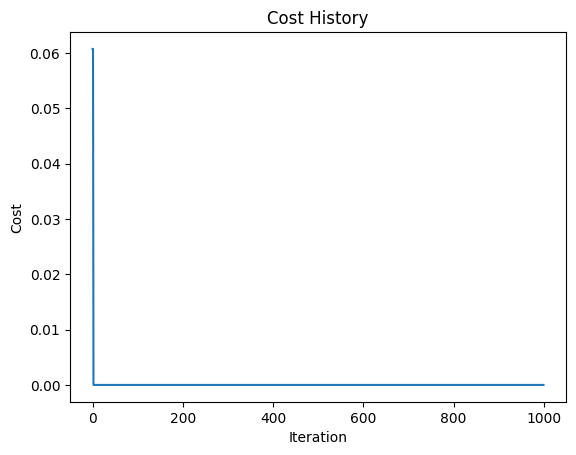

In [76]:
# Plotting the cost history
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost History')
plt.show()


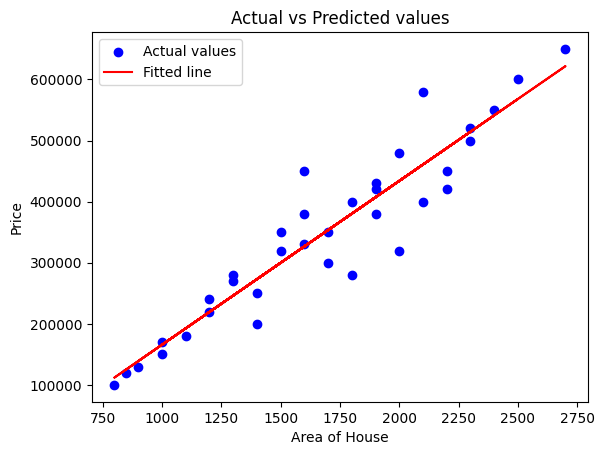

In [77]:
# Plotting the actual vs predicted values
plt.scatter(x, y, color='blue', label='Actual values')
plt.plot(x, compute_predictions(x_b, theta) * y_std + y_mean, color='red', label='Fitted line')
plt.xlabel('Area of House')
plt.ylabel('Price')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()
